<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning_Projects./blob/main/Regression_Car_Fuel_Consumption_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("CarFuelData.xlsx")

In [3]:
df.head(5)

,mpg,Cylinders,displacement,weight,acceleration,model year,car name,car name_numeric_data,car type,km(in 15 yrs.),Co2_Emission(Kg)
0,18.0,8,307.0,3504,12.0,70,buick skylark 320,101,Private Vehicle,114.750,114750.0
1,15.0,8,350.0,3693,11.5,70,plymouth satellite,102,Private Vehicle,95.625,95625.0
2,18.0,8,318.0,3436,11.0,70,amc rebel sst,103,Private Vehicle,114.750,114750.0
3,16.0,8,304.0,3433,12.0,70,ford,104,Private Vehicle,102.000,102000.0
4,17.0,8,302.0,3449,10.5,70,ford plymouth satellite,105,Private Vehicle,108.375,108375.0


In [4]:
df.info

<bound method DataFrame.info of       mpg  Cylinders  displacement  weight  acceleration  model year  \
0    18.0          8         307.0    3504          12.0          70   
1    15.0          8         350.0    3693          11.5          70   
2    18.0          8         318.0    3436          11.0          70   
3    16.0          8         304.0    3433          12.0          70   
4    17.0          8         302.0    3449          10.5          70   
..    ...        ...           ...     ...           ...         ...   
384  36.0          4         135.0    2370          13.0          82   
385  27.0          4         151.0    2950          17.3          82   
386  27.0          4         140.0    2790          15.6          82   
387  44.0          4          97.0    2130          24.6          82   
388  32.0          4         135.0    2295          11.6          82   

                    car name  car name_numeric_data            car type  \
0          buick skylark 320

In [5]:
# To chek whether any row is duplicated or not...
df.duplicated().sum()

0

In [6]:
# To check the Values of Car Type..
df[["car type"]].value_counts()

car type          
Commercial Vehicle    263
 Private Vehicle      126
dtype: int64

In [7]:
# To check the Values of Model Year of the Car..
df[["model year"]].value_counts()

model year
73            40
78            36
76            34
75            30
79            29
80            29
81            29
71            28
72            28
77            28
74            27
82            27
70            24
dtype: int64

In [8]:
df1=pd.get_dummies(df,columns=["car type"],drop_first=True)
df1.head(5)

,mpg,Cylinders,displacement,weight,acceleration,model year,car name,car name_numeric_data,km(in 15 yrs.),Co2_Emission(Kg),car type_Commercial Vehicle
0,18.0,8,307.0,3504,12.0,70,buick skylark 320,101,114.750,114750.0,0
1,15.0,8,350.0,3693,11.5,70,plymouth satellite,102,95.625,95625.0,0
2,18.0,8,318.0,3436,11.0,70,amc rebel sst,103,114.750,114750.0,0
3,16.0,8,304.0,3433,12.0,70,ford,104,102.000,102000.0,0
4,17.0,8,302.0,3449,10.5,70,ford plymouth satellite,105,108.375,108375.0,0


In [9]:
df1=df1.drop(columns=["car name","car name_numeric_data"])


In [10]:
df1.head(5)

,mpg,Cylinders,displacement,weight,acceleration,model year,km(in 15 yrs.),Co2_Emission(Kg),car type_Commercial Vehicle
0,18.0,8,307.0,3504,12.0,70,114.750,114750.0,0
1,15.0,8,350.0,3693,11.5,70,95.625,95625.0,0
2,18.0,8,318.0,3436,11.0,70,114.750,114750.0,0
3,16.0,8,304.0,3433,12.0,70,102.000,102000.0,0
4,17.0,8,302.0,3449,10.5,70,108.375,108375.0,0


In [15]:
# Splitting the data between Training and Testing..
X=df1.drop(columns=["Co2_Emission(Kg)"])
Y=df1[["Co2_Emission(Kg)"]]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=10)

In [21]:
# Scaling the values..
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
print(X_train_scaled.shape)

(311, 8)


In [22]:
# Importing necessary liberaries..
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
# Creating the ANN Architecture..
model=Sequential()
# Creating 3 Nodes in the Hidden Layer and Adding Input data..
model.add(Dense(10,activation="relu",input_dim=8))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
#Creating 1 Node in the Output Layer..
model.add(Dense(1,activation="linear"))

In [32]:
# Analyzing the summary of the Neural Network.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                90        
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 10)               

In [40]:
# Compiling my model..
model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["accuracy"])

In [41]:
# Training the Neural Network..
history=model.fit(X_train_scaled,Y_train,epochs=1500)

Epoch 1/1500
10/10 [==============================] - 4s 7ms/step - loss: 3667713.2500 - accuracy: 0.0000e+00
Epoch 2/1500
10/10 [==============================] - 0s 6ms/step - loss: 2117191.2500 - accuracy: 0.0000e+00
Epoch 3/1500
10/10 [==============================] - 0s 5ms/step - loss: 868862.0625 - accuracy: 0.0000e+00
Epoch 4/1500
10/10 [==============================] - 0s 7ms/step - loss: 284220.9062 - accuracy: 0.0000e+00
Epoch 5/1500
10/10 [==============================] - 0s 5ms/step - loss: 136546.1562 - accuracy: 0.0000e+00
Epoch 6/1500
10/10 [==============================] - 0s 6ms/step - loss: 44192.6836 - accuracy: 0.0000e+00
Epoch 7/1500
10/10 [==============================] - 0s 6ms/step - loss: 17013.0234 - accuracy: 0.0000e+00
Epoch 8/1500
10/10 [==============================] - 0s 5ms/step - loss: 7806.0796 - accuracy: 0.0000e+00
Epoch 9/1500
10/10 [==============================] - 0s 5ms/step - loss: 2982.0203 - accuracy: 0.0000e+00
Epoch 10/1500
10/10 [==

In [42]:
#In order to see the Weights,biases of the First Layer of the Neural Network..
model.layers[0].get_weights()

[array([[-8.52327514e-03,  1.98739454e-01,  2.11441562e-01,
          4.93934691e-01, -2.43405730e-01, -1.70243476e-02,
          5.76029301e-01,  3.78824383e-01, -4.44276243e-01,
          5.64750433e-01],
        [-6.35542423e-02, -5.62452599e-02, -2.60333747e-01,
          8.00203357e-04,  4.78281043e-02,  7.52596855e-02,
          2.34315723e-01,  8.91048536e-02,  1.61313176e-01,
         -1.26996875e-01],
        [-1.31769106e-02, -3.37037742e-02,  2.59096265e-01,
          8.76935646e-02, -1.77615926e-01, -4.07127254e-02,
          5.33068851e-02,  1.38731822e-01, -2.11844608e-01,
         -6.47638664e-02],
        [ 8.65305215e-03, -1.05036899e-01,  6.53482154e-02,
          1.48518849e-02,  2.01659724e-01,  1.27227917e-01,
         -3.38565946e-01, -7.08101094e-01, -1.34924725e-02,
          3.59117121e-01],
        [-1.18070304e-01, -5.92626594e-02,  1.22923125e-03,
         -1.41671285e-01, -2.08287481e-02,  2.18936697e-01,
          1.84693009e-01,  1.54065430e-01, -5.036879

In [43]:
#In order to see the Weights,biases of the Second Layer of the Neural Network..
model.layers[1].get_weights()

[array([[ 0.34492812,  0.6887327 ,  0.32228288,  0.5015934 ,  0.43597665,
         -0.6192091 , -0.49121815, -0.6316339 , -0.21826333,  0.06586466],
        [ 0.68654066,  0.11659565,  0.14917204,  0.02010362,  0.25637   ,
          0.41055435,  0.03665604, -0.14158633,  0.7910733 ,  0.5525773 ],
        [-0.29699835,  0.0256327 ,  0.68841195,  0.32018593,  0.39823326,
         -0.58817744, -0.02355403,  0.38162038,  0.2949387 ,  0.09635315],
        [ 0.43284574,  0.6506545 ,  0.287898  ,  0.00518394,  0.79473186,
          0.01109061,  0.06581533, -0.5143521 ,  0.22352087,  0.4798665 ],
        [-0.23779047,  0.1180587 ,  0.5719513 ,  0.31593496, -0.04339071,
         -0.3913667 , -0.52736336, -0.48630106,  0.0060839 ,  0.30991408],
        [ 0.7963878 ,  0.644612  , -0.00203083, -0.11160193,  0.49309203,
         -0.09526954, -0.39873078,  0.26261845,  0.7044926 ,  0.391504  ],
        [ 0.04807194, -0.21589544,  0.08197063,  0.15936309,  0.72804075,
          0.7457921 ,  0.1132549

In [44]:
# Prediction of Neural Network..
Y_Predicted=model.predict(X_test_scaled)

3/3 [==============================] - 0s 5ms/step


In [46]:
# Calulating the accuracy..
from sklearn.metrics import r2_score
r2_score(Y_test,Y_Predicted)

0.9375862891929577

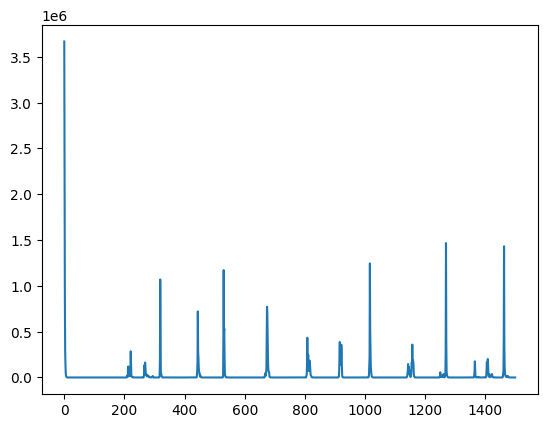

In [48]:
# Plotting the graph of accuracy..
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()